In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import keras
# Deep learning libraries
from keras.models import Model, Sequential


from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
import seaborn as sns

# Explore Data Analysis

In [ ]:
path_normal = "/content/drive/MyDrive/preprocessed_dataset/normal"
path_covid = "/content/drive/MyDrive/preprocessed_dataset/covid"

len_normal = len(os.listdir(path_normal))
len_covid = len(os.listdir(path_covid))

In [ ]:
print(len_normal)
print(len_covid)

10196
3626


[0 1]


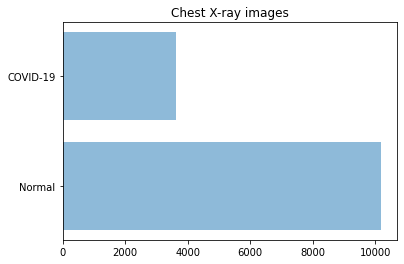

In [ ]:
classes = ('Normal', 'COVID-19')
y_pos = np.arange(len(classes))
print(y_pos)
performance = [len_normal, len_covid]

plt.barh(y_pos,performance, align='center', alpha=0.5)
plt.yticks(y_pos, classes)
plt.title('Chest X-ray images')

plt.show()

**Overview Chest X-ray images**

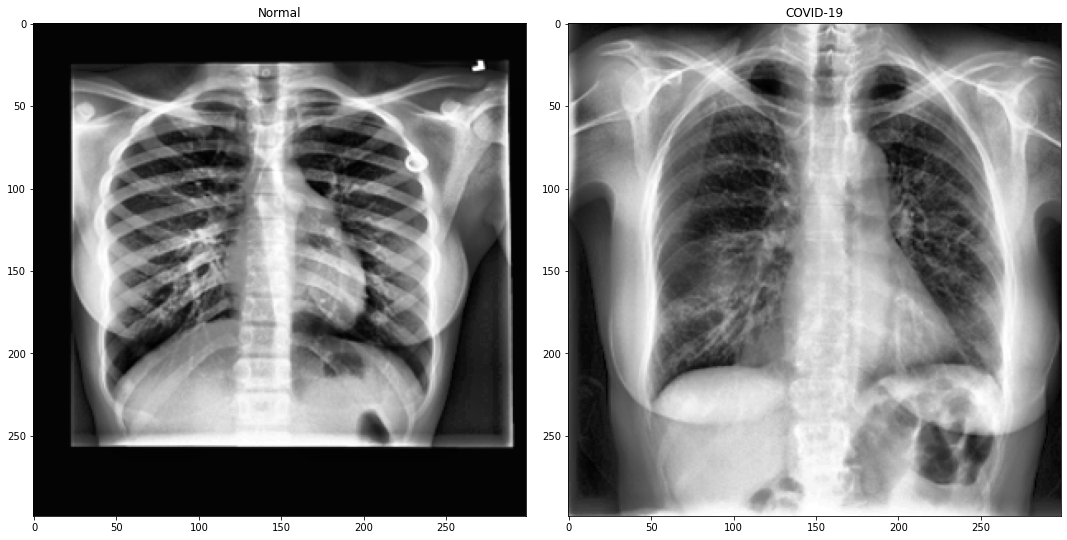

In [ ]:
labels = ['Normal', 'COVID-19']
img1 = path_normal+"/Normal-1.png"
img2 = path_covid+"/COVID-1994.png"

imgs = [img1, img2]

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax = ax.ravel()
plt.tight_layout()

for i in range(0,2):

    ax[i].imshow(plt.imread(imgs[i]), cmap='gray')
    ax[i].set_title(labels[i])

**Load data**

In [ ]:
from keras import preprocessing
from skimage.transform import resize

def resize_image(imgpath):
    img = tf.keras.preprocessing.image.load_img(imgpath)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = resize(img, (224,224), anti_aliasing=True)
    return img

In [ ]:
import os
x_ = list()
y = list()

for i in os.listdir(path_normal):
    try:
        imgpath = path_normal+"/"+i
        img = resize_image(imgpath)
        x_.append(img)
        y.append(0)
    except:
        None
        
for i in os.listdir(path_covid):
    try:
        imgpath = path_covid+"/"+i
        img = resize_image(imgpath)
        x_.append(img)
        y.append(1)
    except:
        None
        
x_ = np.array(x_)

In [ ]:
print(x_.shape)

(13822, 224, 224, 3)
